# To Classify Traffic Signs Using Le-Net Architecture In Keras

# Problem Statement

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


###### Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

# Step 1: Import Libraries And Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Step 2: Image Exploration

1

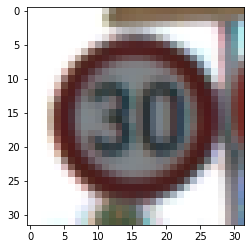

In [10]:
i = 2743
plt.imshow(X_train[i])
y_train[i]

3

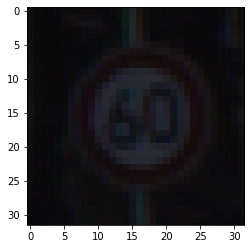

In [11]:
i = 6409
plt.imshow(X_train[i])
y_train[i]

4

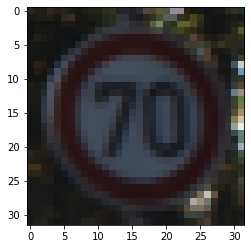

In [12]:
i = 7019
plt.imshow(X_train[i])
y_train[i]

15

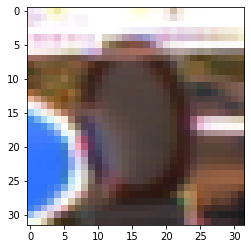

In [13]:
i=30271
plt.imshow(X_train[i])
y_train[i]

7

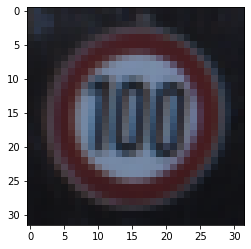

In [14]:
i = 23817
plt.imshow(X_train[i])
y_train[i]

11

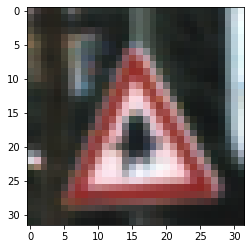

In [15]:
i = 1221
plt.imshow(X_validation[i])
y_validation[i]

8

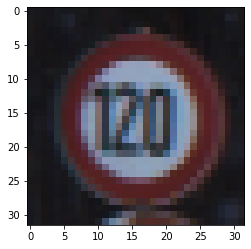

In [16]:
i = 12031
plt.imshow(X_test[i])
y_test[i]

# Step 3: Data Preparation

In [17]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [18]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [19]:
X_train_gray.shape

(34799, 32, 32, 1)

In [20]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [21]:
X_test_gray.shape

(12630, 32, 32, 1)

In [22]:
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [23]:
X_train_gray_norm

array([[[[-0.87239583],
         [-0.86458333],
         [-0.85677083],
         ...,
         [-0.86458333],
         [-0.8671875 ],
         [-0.859375  ]],

        [[-0.86458333],
         [-0.8671875 ],
         [-0.859375  ],
         ...,
         [-0.87239583],
         [-0.86458333],
         [-0.86458333]],

        [[-0.86458333],
         [-0.8671875 ],
         [-0.86197917],
         ...,
         [-0.87239583],
         [-0.87239583],
         [-0.86458333]],

        ...,

        [[-0.51822917],
         [-0.5078125 ],
         [-0.48958333],
         ...,
         [-0.68229167],
         [-0.7421875 ],
         [-0.59635417]],

        [[-0.49479167],
         [-0.49739583],
         [-0.5078125 ],
         ...,
         [-0.77083333],
         [-0.7890625 ],
         [-0.75      ]],

        [[-0.703125  ],
         [-0.72135417],
         [-0.74739583],
         ...,
         [-0.86979167],
         [-0.87239583],
         [-0.88802083]]],


       [[[-0.62239583],


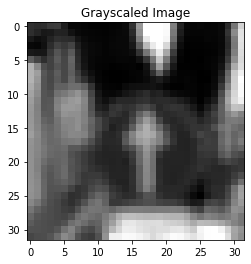

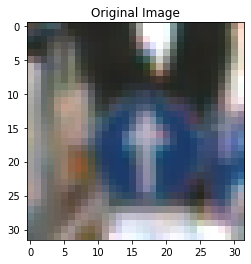

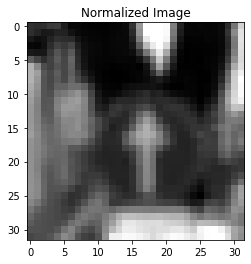

In [24]:
i = 625
plt.title('Grayscaled Image')
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.title('Original Image')
plt.imshow(X_train[i])
plt.figure()
plt.title('Normalized Image')
plt.imshow(X_train_gray_norm[i].squeeze(), cmap= 'gray')

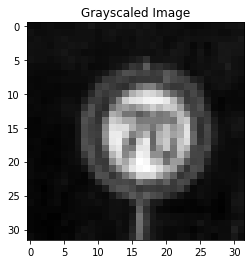

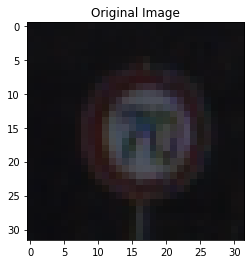

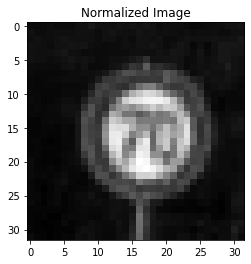

In [25]:
i = 1024
plt.title('Grayscaled Image')
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.title('Original Image')
plt.imshow(X_validation[i])
plt.figure()
plt.title('Normalized Image')
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')

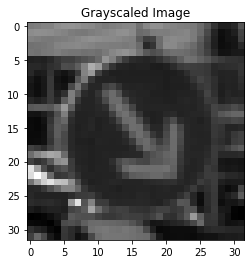

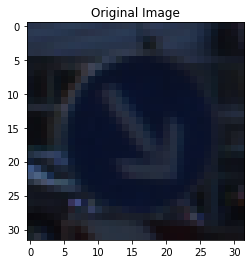

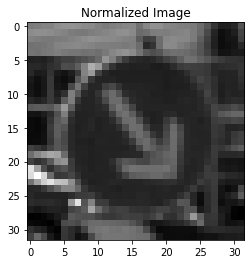

In [26]:
i=2046
plt.title('Grayscaled Image')
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.title('Original Image')
plt.imshow(X_test[i])
plt.figure()
plt.title('Normalized Image')
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

# Step 4: Model Training

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn = Sequential()
cnn.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='relu', input_shape=(32,32,1)))
cnn.add(AveragePooling2D())

cnn.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='relu'))
cnn.add(AveragePooling2D())

cnn.add(Flatten())
cnn.add(Dense(units=120, activation='relu'))

cnn.add(Dense(units=84, activation='relu'))
cnn.add(Dense(units=43, activation='softmax'))

In [29]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['accuracy'])

In [30]:
history = cnn.fit(X_train_gray_norm, 
                y_train, 
                batch_size=500, 
                epochs=50, 
                verbose=1,
                validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 19s 267ms/step - loss: 3.0983 - accuracy: 0.1979 - val_loss: 2.5242 - val_accuracy: 0.3367
Epoch 2/50
70/70 [==============================] - 20s 289ms/step - loss: 1.5820 - accuracy: 0.5579 - val_loss: 1.2887 - val_accuracy: 0.6204
Epoch 3/50
70/70 [==============================] - 18s 262ms/step - loss: 0.8798 - accuracy: 0.7554 - val_loss: 0.9222 - val_accuracy: 0.7263
Epoch 4/50
70/70 [==============================] - 16s 234ms/step - loss: 0.6391 - accuracy: 0.8249 - val_loss: 0.8202 - val_accuracy: 0.7465
Epoch 5/50
70/70 [==============================] - 17s 245ms/step - loss: 0.5163 - accuracy: 0.8568 - val_loss: 0.6954 - val_accuracy: 0.7966
Epoch 6/50
70/70 [==============================] - 17s 240ms/step - loss: 0.4270 - accuracy: 0.8869 - val_loss: 0.6184 - val_accuracy: 0.8206
Epoch 7/50
70/70 [==============================] - 16s 223ms/step - loss: 0.3638 - accuracy: 0.9049 - val_loss: 0.6039 - val_accuracy: 0.8299

# Step 5: Model Evaluation

In [31]:
score = cnn.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy:.{}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.2862 - accuracy: 0.8688
Test Accuracy:.0.8688044548034668


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

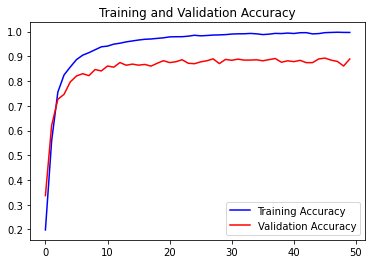

In [37]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

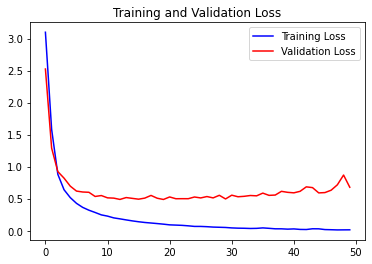

In [38]:
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [41]:
predicted_classes = cnn.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


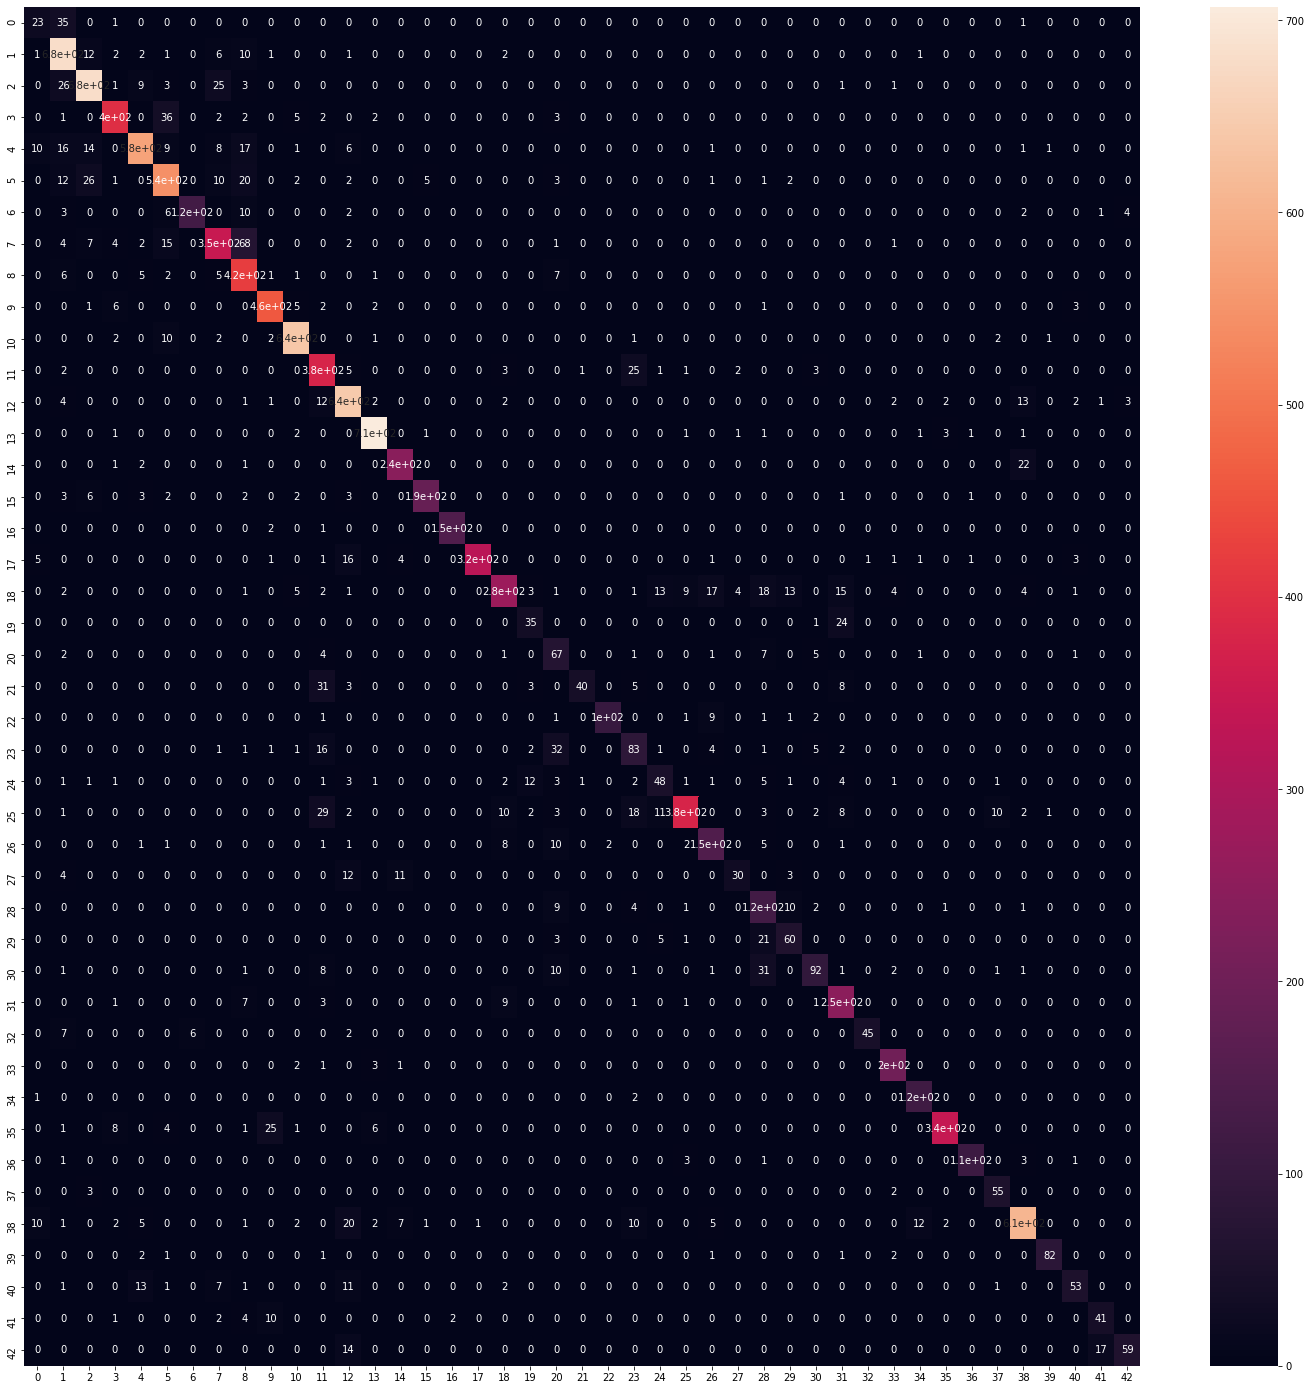

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)

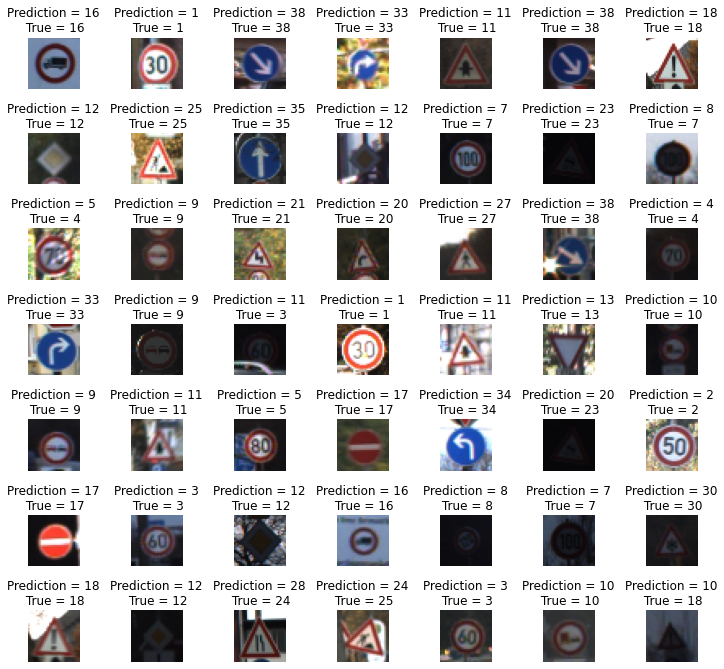

In [44]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in range(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)